<a href="https://colab.research.google.com/github/filipesartori/Segmenta-oPython/blob/main/Mascaramento_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/Colab\ Notebooks/Segmentação\ Python/imagens/ imagens/

In [5]:
def mostrar(imagem):
  fig = plt.gcf()
  fig.set_size_inches(18,6)
  plt.imshow(imagem, cmap='gray')
  plt.axis('off')
  plt.show()

**Mascaramento de Imagens**

Fechamento

In [4]:
img = cv2.imread('/content/imagens/moedas02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
desfoque = cv2.GaussianBlur(gray, (7, 7), 0)
canny = cv2.Canny(desfoque, 80, 140)

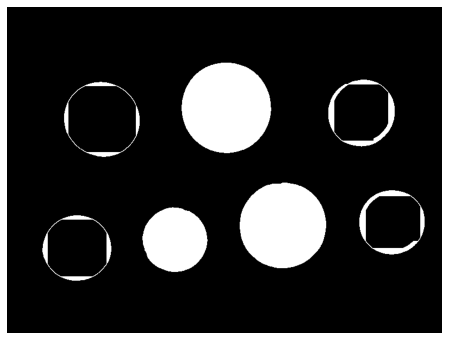

In [6]:
kernel = np.ones((5, 5), np.uint8)
dilatacao = cv2.dilate(canny, kernel, iterations = 14)
erosao = cv2.erode(dilatacao, kernel, iterations = 14)
mostrar(erosao)

Detecção dos contornos

In [7]:
dilatacao = cv2.dilate(canny, np.ones((3,3), np.uint8), iterations=1)
contornos, hierarquia = cv2.findContours(dilatacao, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

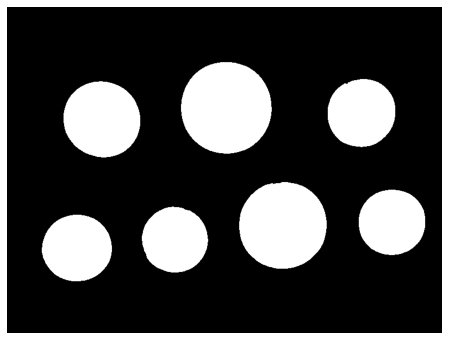

In [9]:
mascara = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
cv2.drawContours(mascara, contornos, -1, color = (255,255,255), thickness=cv2.FILLED)
mostrar(mascara)

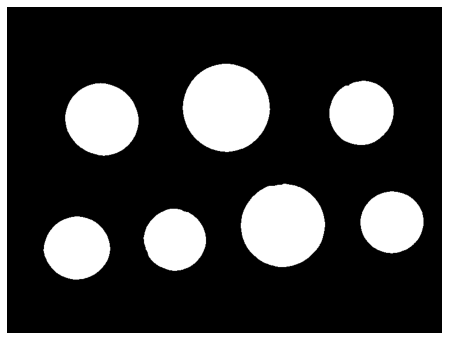

In [10]:
mascara = cv2.erode(mascara, np.ones((3,3), np.uint8), iterations = 3)
mostrar(mascara)

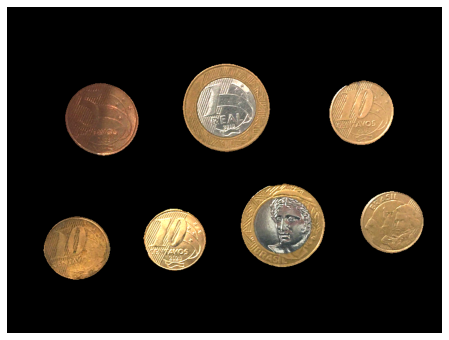

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_final = cv2.add(img, img, mask=mascara)
mostrar(img_final)

Alterando Fundo

In [17]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

In [18]:
altura, largura = img.shape[:2]
mascara = np.zeros((altura, largura), dtype='uint8')

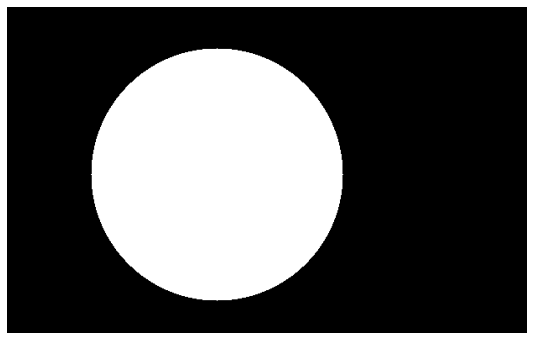

In [19]:
cv2.circle(mascara, (250,200), 150, 255, -1)
mostrar(mascara)

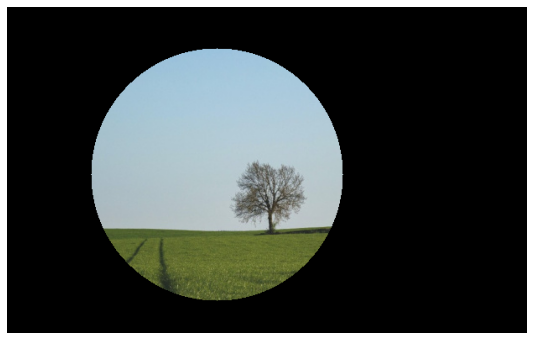

In [22]:
img_final = cv2.bitwise_and(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.cvtColor(img, cv2.COLOR_BGR2RGB), mask=mascara)
mostrar(img_final)

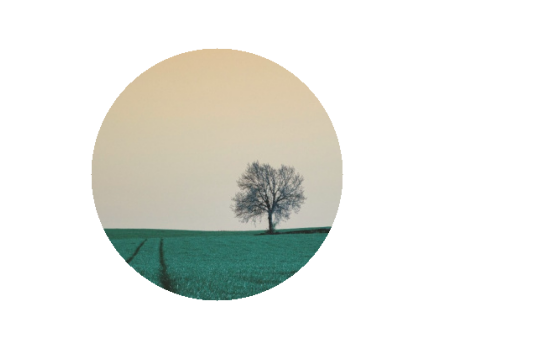

In [24]:
fundo_branco = 255 * np.ones((altura, largura, 3), dtype="uint8")
img_final = img.copy()
img_final[mascara == 0] = fundo_branco [mascara == 0]
mostrar(img_final)

In [25]:
fundo = cv2.imread('/content/imagens/montanha.jpg')
fundo = cv2.resize(fundo, (largura, altura))

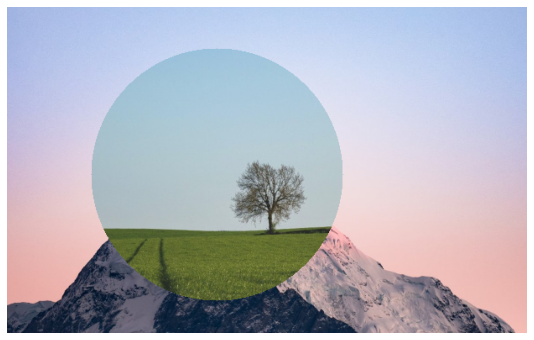

In [29]:
img_final [mascara == 0] = fundo[mascara == 0]
mostrar(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))

Isolando o objeto

In [30]:
img = cv2.imread('/content/imagens/folha_ruido.jpg')
altura, largura = img.shape[:2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
desfoque = cv2.GaussianBlur(gray, (7, 7), 0)

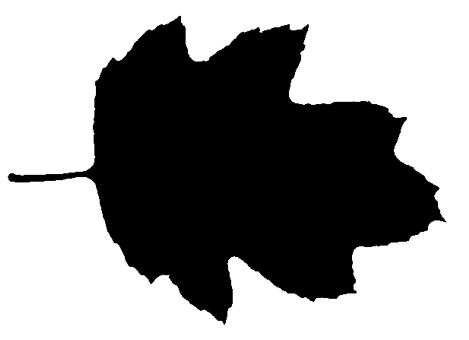

In [37]:
valor, mascara = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
mostrar(mascara)

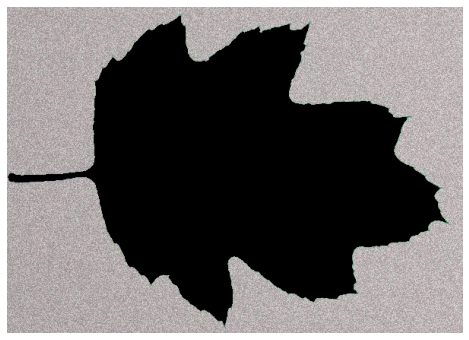

In [38]:
img_final = cv2.bitwise_and(img, img, mask=mascara)
mostrar(img_final)

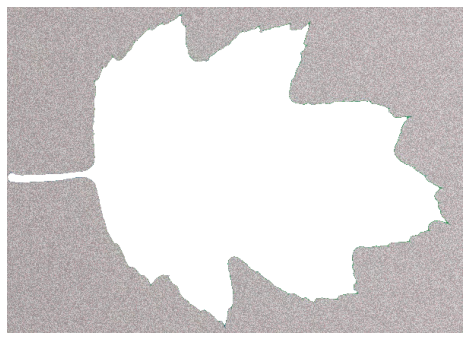

In [39]:
fundo_branco = 255 * np.ones((altura, largura, 3), dtype='uint8')
img_final = img.copy()
img_final [mascara == 0] = fundo_branco [mascara == 0]
mostrar(img_final)

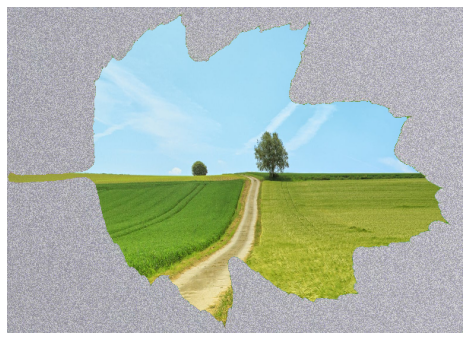

In [40]:
fundo = cv2.imread('/content/imagens/paisagem03.jpg')
fundo = cv2.resize(fundo, (largura, altura))
img_final[mascara == 0] = fundo [mascara == 0]
mostrar(cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB))